In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
raw_data = pd.read_csv('data.csv')

raw_df = pd.DataFrame({
    "gender": raw_data.gender,
    "race": raw_data.race,
    "age": raw_data.age,  
    "atrial_fibrillation": raw_data.atrial_fibrillation,
    "ischemic_stroke": raw_data.ischemic_stroke, 
    "trsnsient_ischemic_attack": raw_data.trsnsient_ischemic_attack,
    "peripheral_arterial_occusive": raw_data.peripheral_arterial_occusive, 
    "myocardial_infarction": raw_data.myocardial_infarction,
    "congestive_heart_failure": raw_data.congestive_heart_failure,
    "hypertension": raw_data.hypertension,
    "diabates_mellitus": raw_data.diabates_mellitus,
    "hyperlipidemia": raw_data.hyperlipidemia,
    "aspirin": raw_data.aspirin,
    #"warfarin":raw_data.warfarin,
    "bb": raw_data.bb,
    "heartrate_max": raw_data.heartrate_max,
    "sbp_min": raw_data.sbp_min,
    #"map_min": raw_data.map_min,
    "base_excess_val": raw_data.base_excess_val,
    "ph_val": raw_data.ph_val,
    "hemoglobin_val": raw_data.hemoglobin_val,
    "lactate_val": raw_data.lactate_val,
    "pt_val": raw_data.pt_val,
    "ptt_val": raw_data.ptt_val,
    "inr_val": raw_data.inr_val,
    "urea_nitrogen_val": raw_data.urea_nitrogen_val,
    "creatinine_val": raw_data.creatinine_val,
    "platelet_count_val": raw_data.platelet_count_val,
    "bilirubin_val": raw_data.bilirubin_val,
    "albumin_val": raw_data.albumin_val,
    "bun": raw_data.bun,
    "label": raw_data.trans
})
# change the race and gender into values
raw_df['gender'] = raw_df['gender'].replace(['F'], 1)
raw_df['gender'] = raw_df['gender'].replace(['M'], 0)
raw_df['race'] = raw_df['race'].replace(['WHITE'], 1)
raw_df['race'] = raw_df['race'].replace(['BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN',
       'WHITE - OTHER EUROPEAN', 'OTHER', 'ASIAN','UNKNOWN'],0)
raw_df['race'] = raw_df['race'].replace(['ASIAN - CHINESE', 'BLACK/CARIBBEAN ISLAND', 'BLACK/CAPE VERDEAN',
       'ASIAN - SOUTH EAST ASIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN'],0)
raw_df['race'] = raw_df['race'].replace(['PATIENT DECLINED TO ANSWER', 'MULTIPLE RACE/ETHNICITY',
       'HISPANIC/LATINO - HONDURAN', 'UNABLE TO OBTAIN', 'PORTUGUESE',
       'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC OR LATINO'],0)
raw_df['race'] = raw_df['race'].replace(['AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN',
       'WHITE - BRAZILIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - MEXICAN',
       'SOUTH AMERICAN'],0)
raw_df['race'] = raw_df['race'].replace(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ASIAN - ASIAN INDIAN', 'ASIAN - KOREAN'],0)
raw_df['gender']=raw_df['gender'].astype(float)
raw_df['race']=raw_df['race'].astype(float)
raw_df
# data pre-processing
all_features = list(raw_df)
target = ['label']
features = list(set(all_features)-set(target))
# raw_df.features = DataScaler(raw_df.features)
# raw_df[:,features] = DataScaler(raw_df[:,features])

# fill the binary missing values
raw_df['atrial_fibrillation'] = raw_df['atrial_fibrillation'].fillna(0)
raw_df['ischemic_stroke'] = raw_df['ischemic_stroke'].fillna(0)
raw_df['trsnsient_ischemic_attack'] = raw_df['trsnsient_ischemic_attack'].fillna(0)
raw_df['peripheral_arterial_occusive'] = raw_df['peripheral_arterial_occusive'].fillna(0)
raw_df['myocardial_infarction'] = raw_df['myocardial_infarction'].fillna(0)
raw_df['congestive_heart_failure'] = raw_df['congestive_heart_failure'].fillna(0)
raw_df['hypertension'] = raw_df['hypertension'].fillna(0)
raw_df['diabates_mellitus'] = raw_df['diabates_mellitus'].fillna(0)
raw_df['hyperlipidemia'] = raw_df['hyperlipidemia'].fillna(0)
raw_df['aspirin'] = raw_df['aspirin'].fillna(0)
#raw_df['warfarin'] = raw_df['warfarin'].fillna(0)
raw_df['bb'] = raw_df['bb'].fillna(0)

raw_df
# raw_df(raw_df.info())
# Impute with mean imputation

from sklearn.impute import SimpleImputer
df = raw_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['heartrate_max'] = mean_imputer.fit_transform(df['heartrate_max'].values.reshape(-1,1))
#df['map_min'] = mean_imputer.fit_transform(df['map_min'].values.reshape(-1,1))
df['base_excess_val'] = mean_imputer.fit_transform(df['base_excess_val'].values.reshape(-1,1))
df['ph_val'] = mean_imputer.fit_transform(df['ph_val'].values.reshape(-1,1))
df['hemoglobin_val'] = mean_imputer.fit_transform(df['hemoglobin_val'].values.reshape(-1,1))
df['lactate_val'] = mean_imputer.fit_transform(df['lactate_val'].values.reshape(-1,1))
df['pt_val'] = mean_imputer.fit_transform(df['pt_val'].values.reshape(-1,1))
df['ptt_val'] = mean_imputer.fit_transform(df['ptt_val'].values.reshape(-1,1))
df['inr_val'] = mean_imputer.fit_transform(df['inr_val'].values.reshape(-1,1))
df['urea_nitrogen_val'] = mean_imputer.fit_transform(df['urea_nitrogen_val'].values.reshape(-1,1))
df['creatinine_val'] = mean_imputer.fit_transform(df['creatinine_val'].values.reshape(-1,1))
df['platelet_count_val'] = mean_imputer.fit_transform(df['platelet_count_val'].values.reshape(-1,1))
df['bilirubin_val'] = mean_imputer.fit_transform(df['bilirubin_val'].values.reshape(-1,1))
df['albumin_val'] = mean_imputer.fit_transform(df['albumin_val'].values.reshape(-1,1))
df
# reduce the dtype
df = df.astype('float32')
# varice need transfusion
df["label"].value_counts()

0.0    2393
1.0     581
Name: label, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split
y = df.loc[:,'label']
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=2)
y_test

1499    0.0
1076    0.0
2053    0.0
2266    0.0
997     0.0
       ... 
2123    0.0
806     0.0
2009    0.0
1341    0.0
1210    0.0
Name: label, Length: 744, dtype: float32

In [3]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    max_depth='20',
    learning_rate=0.010000012,
    max_leaves=20
)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.010000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth='20', max_leaves=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
score=accuracy_score(y_pred,y_test)
score

0.8333333333333334

In [5]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(X_test)
y_pred_proba[:,1] #想看输血分类为1的概率
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])

In [6]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba[:,1])

0.8520407575844798

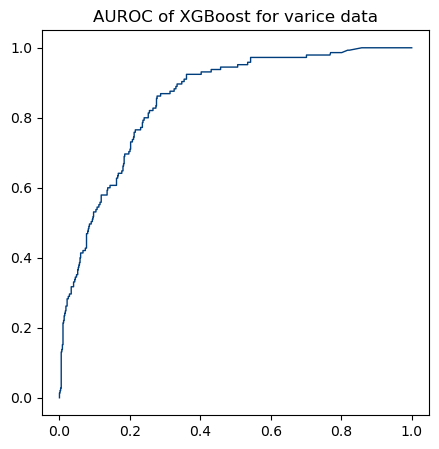

In [7]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (5,5))
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.title('AUROC of XGBoost for varice data')
plt.plot(fpr,tpr,c = '#003D7C',ls='-',lw = 1,  ms = 8, mec='r',mew=3,mfc='y',alpha =1)
plt.show()

Text(46.25, 0.5, 'True')

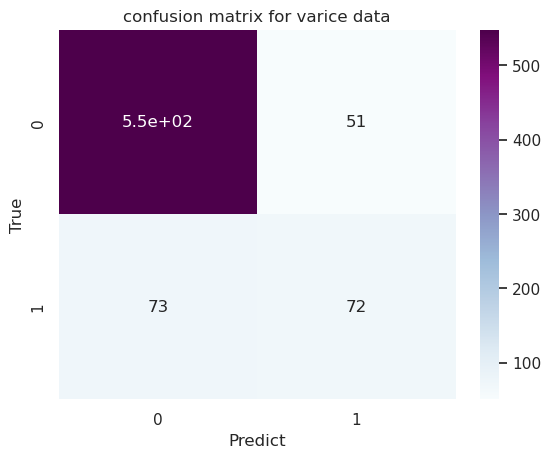

In [8]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sn.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_pred, labels=[0, 1])
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for varice data')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [9]:
tpr

array([0.        , 0.00689655, 0.0137931 , 0.0137931 , 0.02068966,
       0.02068966, 0.02758621, 0.02758621, 0.13103448, 0.13103448,
       0.13793103, 0.13793103, 0.15172414, 0.15172414, 0.2137931 ,
       0.2137931 , 0.22068966, 0.22068966, 0.23448276, 0.23448276,
       0.24137931, 0.24137931, 0.24827586, 0.24827586, 0.26206897,
       0.26206897, 0.28275862, 0.28275862, 0.28965517, 0.28965517,
       0.29655172, 0.29655172, 0.31724138, 0.31724138, 0.33103448,
       0.33103448, 0.33793103, 0.33793103, 0.34482759, 0.34482759,
       0.35172414, 0.35172414, 0.36551724, 0.36551724, 0.37241379,
       0.37241379, 0.37931034, 0.37931034, 0.3862069 , 0.3862069 ,
       0.4       , 0.4       , 0.4137931 , 0.4137931 , 0.42068966,
       0.42068966, 0.42758621, 0.42758621, 0.46896552, 0.46896552,
       0.47586207, 0.47586207, 0.48275862, 0.48275862, 0.48965517,
       0.48965517, 0.49655172, 0.49655172, 0.50344828, 0.50344828,
       0.51034483, 0.51034483, 0.51724138, 0.51724138, 0.53103

In [10]:
thres

array([1.7702943 , 0.7702943 , 0.76484376, 0.7594069 , 0.7422612 ,
       0.7298671 , 0.72557056, 0.7239597 , 0.6665596 , 0.6632409 ,
       0.66126907, 0.66067046, 0.65502524, 0.65270865, 0.6357931 ,
       0.6309569 , 0.6296258 , 0.6248487 , 0.62241495, 0.6213451 ,
       0.6203407 , 0.6174817 , 0.6116601 , 0.6087237 , 0.5981158 ,
       0.59438384, 0.5914565 , 0.5885628 , 0.5875669 , 0.5805157 ,
       0.5797353 , 0.57619196, 0.5690653 , 0.5638678 , 0.5607193 ,
       0.55968386, 0.55921423, 0.5588069 , 0.5580792 , 0.55774295,
       0.5570873 , 0.55590415, 0.55569905, 0.55361253, 0.5508395 ,
       0.5498014 , 0.5493021 , 0.54929394, 0.5484255 , 0.54727554,
       0.544214  , 0.54295063, 0.53447616, 0.52521604, 0.52500606,
       0.5221289 , 0.5217184 , 0.5183977 , 0.5092922 , 0.50795776,
       0.50758004, 0.5069734 , 0.50626355, 0.50570774, 0.502595  ,
       0.50205487, 0.5011583 , 0.4975663 , 0.49563217, 0.48729375,
       0.4851996 , 0.484275  , 0.48403704, 0.48306388, 0.48159

In [11]:
y_threshold = 1.53886926e-04

In [12]:
y_pred_proba=model.predict_proba(X_test)

In [13]:
y_pred_thres = (y_pred_proba[:,1]>=y_threshold).astype(int)

In [14]:
C2

array([[548,  51],
       [ 73,  72]])

In [15]:
df.columns

Index(['gender', 'race', 'age', 'atrial_fibrillation', 'ischemic_stroke',
       'trsnsient_ischemic_attack', 'peripheral_arterial_occusive',
       'myocardial_infarction', 'congestive_heart_failure', 'hypertension',
       'diabates_mellitus', 'hyperlipidemia', 'aspirin', 'bb', 'heartrate_max',
       'sbp_min', 'base_excess_val', 'ph_val', 'hemoglobin_val', 'lactate_val',
       'pt_val', 'ptt_val', 'inr_val', 'urea_nitrogen_val', 'creatinine_val',
       'platelet_count_val', 'bilirubin_val', 'albumin_val', 'bun', 'label'],
      dtype='object')

In [16]:
feature_list = ['gender', 'race', 'age', 'atrial_fibrillation',
       'ischemic_stroke', 'trsnsient_ischemic_attack',
       'peripheral_arterial_occusive', 'myocardial_infarction',
       'congestive_heart_failure', 'hypertension', 'diabates_mellitus',
       'hyperlipidemia', 'aspirin', 'warfarin', 'bb', 'heartrate_max',
       'map_min', 'base_excess_val', 'ph_val', 'hemoglobin_val', 'lactate_val',
       'pt_val', 'ptt_val', 'inr_val', 'urea_nitrogen_val', 'creatinine_val',
       'platelet_count_val', 'bilirubin_val', 'albumin_val', 'varice']

In [17]:
importances = list(model.feature_importances_)

# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances)}

# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: base_excess_val      Importance: 0.17000000178813934
Variable: map_min              Importance: 0.10000000149011612
Variable: albumin_val          Importance: 0.10000000149011612
Variable: bilirubin_val        Importance: 0.05999999865889549
Variable: gender               Importance: 0.05000000074505806
Variable: ph_val               Importance: 0.05000000074505806
Variable: hemoglobin_val       Importance: 0.05000000074505806
Variable: hyperlipidemia       Importance: 0.03999999910593033
Variable: heartrate_max        Importance: 0.03999999910593033
Variable: age                  Importance: 0.029999999329447746
Variable: myocardial_infarction Importance: 0.029999999329447746
Variable: diabates_mellitus    Importance: 0.029999999329447746
Variable: bb                   Importance: 0.029999999329447746
Variable: pt_val               Importance: 0.029999999329447746
Variable: ptt_val              Importance: 0.029999999329447746
Variable: inr_val              Importance: 0.029

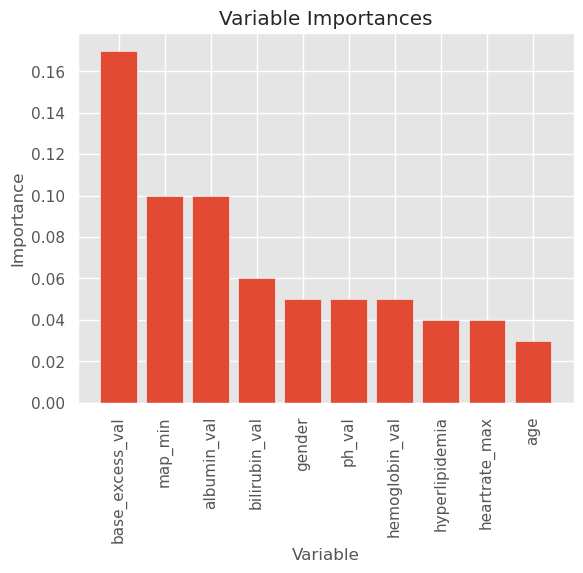

In [18]:
plt.style.use('ggplot')

top = 10
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');